In [30]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('./final_data.csv')

In [32]:
#Delete unrelevent columns, this column not relevent to busniss statment and have alot null value so can change analysis data
df.drop(['player'],axis=1,inplace=True)
df.drop(['minutes played'],axis=1,inplace=True)
df.drop(['position_encoded'],axis=1,inplace=True)
df.drop(['days_injured'],axis=1,inplace=True)
df.drop(['winger'],axis=1,inplace=True)


In [33]:
df.drop(['goals conceded'],axis=1,inplace=True)
df.drop(['clean sheets'],axis=1,inplace=True)

In [34]:
df = df[
    (df['highest_value'] < 5.000000e+07) & (df['highest_value'] > 4.900000e+05)
]

In [35]:
df = df[
    (df['current_value'] <= 3.000000e+07) & (df['current_value'] > 5.00000e+05)
]

In [36]:
df = df[
    (df['age'] <40) & (df['age'] > 17)
]

In [37]:
df = df[
    (df['appearance'] <= 100) & (df['appearance'] > 1)
]

In [38]:
df = df[
    (df['award'] <= 20)
]

In [39]:
categorical_features = ['team', 'name', 'position']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards','second yellow cards','red cards'
                    ,'games_injured','award','current_value','highest_value']

In [40]:
df['position_numeric'] = pd.factorize(df['position'])[0]
df

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,games_injured,award,current_value,highest_value,position_numeric
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,58,1,1500000,22000000,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,84,4,600000,6000000,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0,0.000000,19,10,15000000,35000000,1
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0,0.000000,169,7,2000000,20000000,1
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,13,0,2000000,2000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10692,Sydney FC,Joe Lolley,Attack-RightWinger,179.0,30.0,58,0.166256,0.193966,0.083128,0.0,0.027709,33,0,1800000,8000000,7
10718,Adelaide United,Craig Goodwin,Attack-LeftWinger,183.0,31.0,55,0.449902,0.332536,0.136927,0.0,0.000000,1,3,1500000,1500000,6
10729,Western Sydney Wanderers,Marcelo,Defender Centre-Back,191.0,36.0,47,0.091347,0.022837,0.251205,0.0,0.045674,2,5,800000,9000000,1
10736,Western Sydney Wanderers,Morgan Schneiderlin,midfield-DefensiveMidfield,186.0,33.0,36,0.107399,0.107399,0.268496,0.0,0.053699,42,5,1500000,30000000,4


In [41]:
df = df[['appearance', 'goals','position_numeric', 'current_value']]


In [42]:
# Prepare data
X = df

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_scaled.shape


(5909, 4)

In [44]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

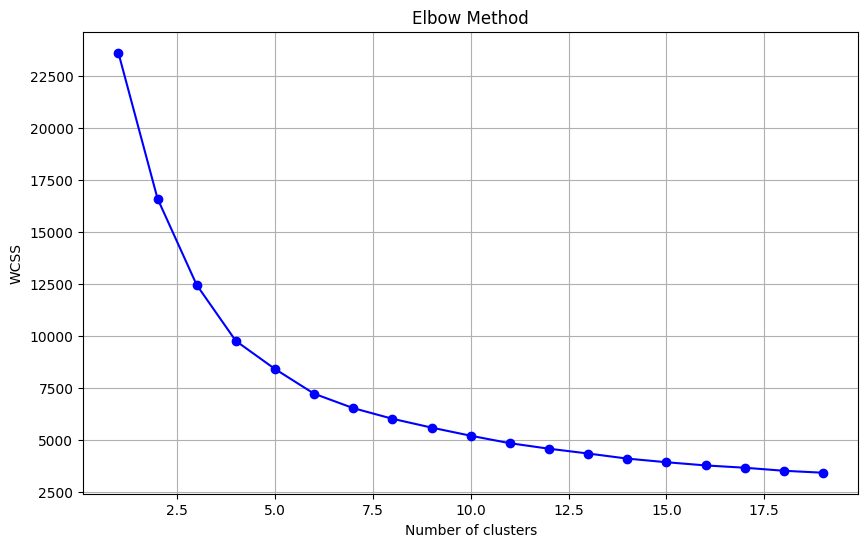

In [45]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [47]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

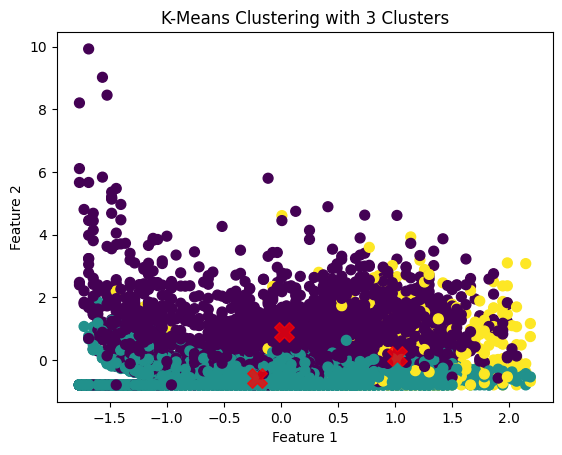

In [48]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [49]:
X['kmeans'] = y_pred
X['kmeans'].value_counts()


kmeans
1    3289
0    1975
2     645
Name: count, dtype: int64

<Axes: xlabel='appearance', ylabel='goals'>

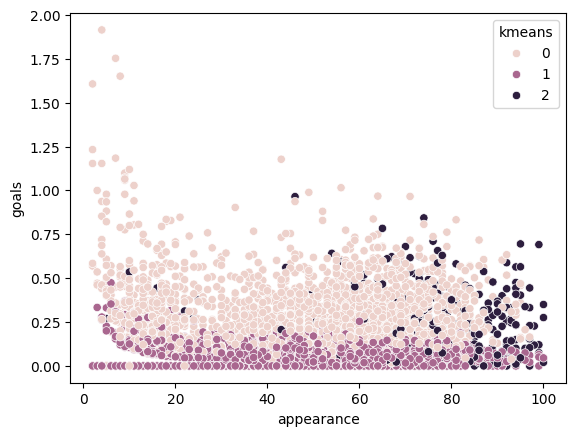

In [50]:
sns.scatterplot(data = X , x = 'appearance', y = 'goals', hue = 'kmeans')


<Axes: xlabel='position_numeric', ylabel='goals'>

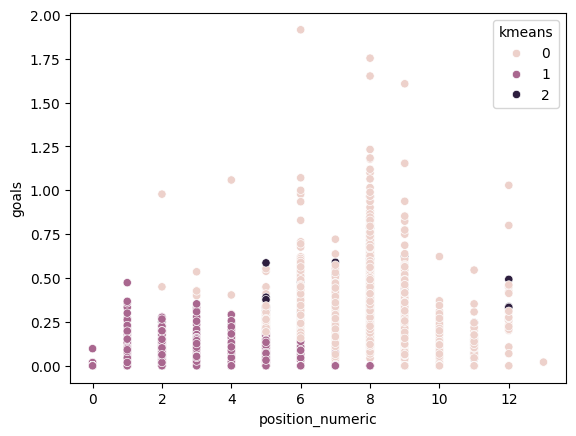

In [51]:
sns.scatterplot(data = X , x = 'position_numeric', y = 'goals', hue = 'kmeans')


<Axes: xlabel='position_numeric', ylabel='goals'>

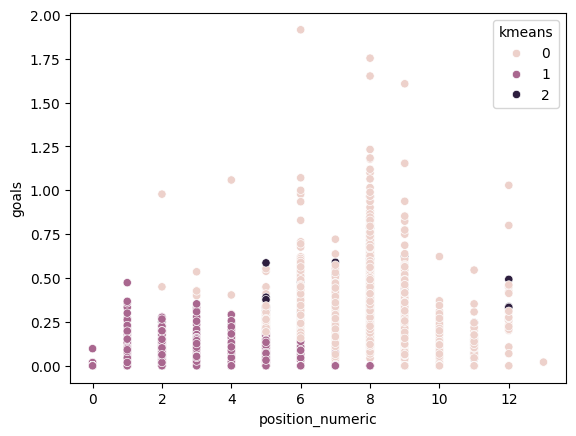

In [52]:
sns.scatterplot(data = X , x = 'position_numeric', y = 'goals', hue = 'kmeans')


In [53]:
X.head()

,appearance,goals,position_numeric,current_value,kmeans
1,15,0.0,0,1500000,1
2,4,0.0,0,600000,1
6,70,0.0,1,15000000,2
7,8,0.0,1,2000000,1
8,34,0.0,1,2000000,1


In [54]:
X.columns

Index(['appearance', 'goals', 'position_numeric', 'current_value', 'kmeans'], dtype='object')

<Axes: xlabel='current_value', ylabel='goals'>

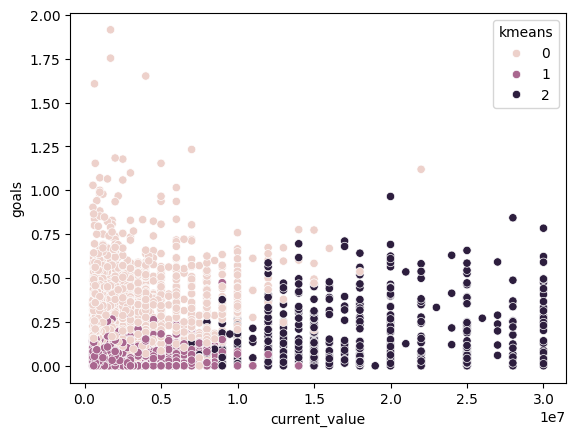

In [55]:
sns.scatterplot(data = X , x = 'current_value', y = 'goals', hue = 'kmeans')


,appearance,goals,position_numeric,current_value,kmeans
1,15,0.000000,0,1500000,1
2,4,0.000000,0,600000,1
6,70,0.000000,1,15000000,2
7,8,0.000000,1,2000000,1
8,34,0.000000,1,2000000,1
10,89,0.012619,2,22000000,2
11,34,0.000000,2,10000000,1
13,60,0.000000,3,22000000,2
15,76,0.096010,4,25000000,2
17,74,0.144046,5,20000000,2


In [56]:
import joblib
joblib.dump(model, 'kmeans_model.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')

['Models/scaler.joblib']